# Bibliotecas a utilizar

In [1]:
# Bibliotecas a utilizar 
import numpy                   as np      # Uso de álgebra lineal, funciones vectoriales
import pandas                  as pd      # Trabajar con DataFrames
import matplotlib.pyplot       as plt     # Para realizar gráficas
from sklearn.metrics           import accuracy_score     # Función para calcular la precisión de clasificación
from sklearn.metrics           import confusion_matrix   # Función para calcular una matriz de confusión
from sklearn                   import svm                # Biblioteca con funciones de SVM
from sklearn.datasets          import make_blobs         # Función para generar puntos aleatorios

#sns.set()
import warnings
warnings.filterwarnings('ignore')

## Ejemplo 1

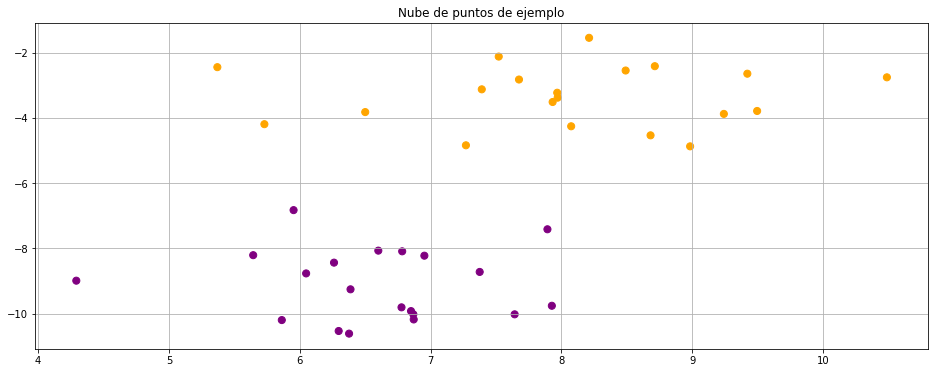

In [2]:
# Creamos 40 puntos y los graficamos
X, y = make_blobs(n_samples=40, centers=2, random_state=6)
plt.subplots( nrows = 1, ncols = 1, figsize=(16,6) )
plt.title("Nube de puntos de ejemplo")
plt.scatter(X[:, 0], X[:, 1], c=[ "purple" if x == 1 else "orange" for x in y], s=50)
plt.grid()
plt.show()

In [3]:
# Generamos nuestro clasificador
clasificador_svm = svm.SVC(kernel='linear').fit(X, y)
clasificador_svm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [4]:
# Limites de la grafica actual
xlim   = [ X[:,0].min(), X[:,0].max() ]
ylim   = [ X[:,1].min(), X[:,1].max() ]
XX, YY = np.meshgrid( np.linspace(xlim[0], xlim[1], 30) , np.linspace(ylim[0], ylim[1], 30) )
XY     = np.vstack( [XX.ravel(), YY.ravel()] ).T
Z      = clasificador_svm.decision_function( XY ).reshape(XX.shape)

In [ ]:
# Graficamos los puntos
plt.subplots( nrows = 1, ncols = 1, figsize=(16,6) )
plt.title("Nube de puntos de ejemplo")
plt.scatter(X[:, 0], X[:, 1], c=[ "purple" if x == 1 else "orange" for x in y], s=50)
# Graficamos las lineas de decision
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'] )
# Graficamos los vectores de soporte
plt.scatter(clasificador_svm.support_vectors_[:, 0], clasificador_svm.support_vectors_[:, 1], s=150,
           linewidth=1, facecolors='none', edgecolors='red')
plt.grid()
plt.show()

# Ejemplo 2

In [ ]:
# Leemos datos de ejemplo
datos_2          = pd.read_csv("datos_2.csv")   # Datos con dos clases
datos_2["CLASE"] = [ 1 if x=="#1F77B4" else -1 for x in np.array(datos_2["Z"]) ]
datos_ejemplo    = datos_2.sample(n=100,random_state=10)

# Graficamos nuestros puntos
fig, axs = plt.subplots( nrows = 1, ncols = 1, figsize=(16,6) )
axs.set_title("Segunda Nube de Puntos")
axs.scatter( x=datos_ejemplo["X"], y=datos_ejemplo["Y"], c=datos_ejemplo["Z"], label="Puntos")
plt.grid()
plt.show()

In [ ]:
# Generamos nuestro clasificador
matriz_diseño    = datos_ejemplo.values[:,0:2]
y_reales         = datos_ejemplo.values[:,  2]
clasificador_svm = svm.SVC(kernel='linear').fit( matriz_diseño, y_reales )
clasificador_svm

In [ ]:
y_estimadas = clasificador_svm.predict( matriz_diseño )
print( "Precisión del modelo :: ", accuracy_score( y_reales, y_estimadas ) * 100, "%" )

In [ ]:
x_lim      = [ datos_ejemplo["X"].min() - 1, datos_ejemplo["X"].max() + 1 ]
y_lim      = [ datos_ejemplo["Y"].min() - 1, datos_ejemplo["Y"].max() + 1 ]
XX, YY     = np.meshgrid( np.linspace(x_lim[0], x_lim[1], 100  ), np.linspace(y_lim[0], y_lim[1], 100 ) )
XY         = np.vstack( [XX.ravel(), YY.ravel()] ).T
Z_fondo    = np.array([ 1 if x=="#D62728" else 2 for x in clasificador_svm.predict( XY )]).reshape( XX.shape ) 
Z_decision = clasificador_svm.decision_function( XY ).reshape( XX.shape )

In [ ]:
# Graficamos nuestros puntos
plt.subplots( nrows = 1, ncols = 1, figsize=(16,6) )
plt.title("Segunda Nube de Puntos")
# Graficamos los puntos
plt.scatter( x=datos_ejemplo["X"], y=datos_ejemplo["Y"], c=datos_ejemplo["Z"], label="Puntos")
# Graficamos la regla de decisión / recta
plt.contour( XX, YY, Z_decision, levels=[-1,0,1], alpha=0.9, colors="k", linestyles=['--', '-', '--'] )
# Graficamos el fondo para identificar la clase
plt.contourf(XX, YY, Z_fondo, colors=["red","blue"], alpha=0.2)
# Graficamos los vectores de soporte
plt.scatter(clasificador_svm.support_vectors_[:, 0], clasificador_svm.support_vectors_[:, 1], s=150,
           linewidth=1, facecolors='none', edgecolors='red')
plt.show()
print("Precisión del modelo :: ", clasificador_svm.score( matriz_diseño, y_reales )*100, "%" )

## Ejemplo 3

In [ ]:
datos_2.head()

In [ ]:
# Leemos datos de ejemplo
datos_2          = pd.read_csv("datos_2.csv")   # Datos con dos clases

# Generamos nuestro clasificador
matriz_diseño    = datos_2.values[:,0:2]
y_reales         = datos_2.values[:,  2]
clasificador_svm = svm.SVC(kernel='linear').fit( matriz_diseño, y_reales )
clasificador_svm


# Graficamos nuestros puntos
plt.subplots( nrows = 1, ncols = 1, figsize=(16,6) )
plt.title("Segunda Nube de Puntos")
# Graficamos los puntos
plt.scatter( x=datos_2["X"], y=datos_2["Y"], c=datos_2["Z"], label="Puntos", alpha = 0.6)
# Obtenemos los limites de la grafica actual para poder calcular Z
x_lim      = plt.gca().get_xlim()
y_lim      = plt.gca().get_ylim()
XX, YY     = np.meshgrid( np.linspace(x_lim[0], x_lim[1], 100  ), np.linspace(y_lim[0], y_lim[1], 100 ) )
XY         = np.vstack( [XX.ravel(), YY.ravel()] ).T
Z_fondo    = np.array([ 1 if x=="#D62728" else 2 for x in clasificador_svm.predict( XY )]).reshape( XX.shape ) 
Z_decision = clasificador_svm.decision_function( XY ).reshape( XX.shape )
# Graficamos el fondo para identificar la clase
plt.contourf(XX, YY, Z_fondo   , colors=["red","blue"], alpha=0.05)
# Graficamos la regla de decisión / recta
plt.contour( XX, YY, Z_decision, levels=[-1,0,1], alpha=0.6, colors="k", linestyles=['--', '-', '--'] )
# Graficamos los vectores de soporte
plt.scatter(clasificador_svm.support_vectors_[:, 0], clasificador_svm.support_vectors_[:, 1], s=150,
           linewidth=2, facecolors='none', edgecolors='green')
plt.show()

print("Precisión del modelo :: ", clasificador_svm.score( matriz_diseño, y_reales )*100, "%" )

In [ ]:
def ClasificadorMike( X ):
    clases = []
    for i in range( X.shape[0] ):
        x, y = X[i, 0] , X[i, 1]
        # Mi regla es Azul si Y > -X, Rojo si Y < -X
        resultado = "#1F77B4" if y > -x else "#D62728"
        clases.append( resultado )
    return np.array( clases )
        
y_estimadas_mike = ClasificadorMike( datos_2.values[:,0:2] )
print( "Precisión del modelo :: ", accuracy_score( y_reales, y_estimadas_mike )*100, "%" )
print( "Matriz de confusión  :: \n",confusion_matrix( y_reales, y_estimadas_mike ) )